<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 5 (Assignment) -- Convolutional neural networks </h2>

# Exercise 0
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the following modules/symbols:

- <code>u5_utils</code>
- <code>torch</code>
- <code>torch.nn</code>
- <code>torch.optim</code>
- <code>torchvision.datasets</code>
- <code>matplotlib.pyplot</code>
- <code>matplotlib.image</code>
- <code>cv2</code>
- <code>numpy</code>
- <code>types.SimpleNamespace</code>
- <code>warnings</code>

In [1]:
import u5_utils as u5
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from types import SimpleNamespace
import warnings
warnings.filterwarnings(r'ignore')


Afterwards, check if the <code>torch</code> module was correctly imported, by computing the <i>median</i> of <code>[7, 2, 4, 9]</code> and printing the result.

In [2]:
torch.median(torch.as_tensor([7, 2, 4, 9], dtype=torch.float32))


tensor(4.)

# Exercise 1
Fortunately, our research dog <i>Charlie</i> agreed to help us out one more time for this assignment. He supplied us with a beautiful depiction of himself, nourishing our experiments with <i>convolutions</i> and <i>filters</i>. As always, try to get familiar with the data you're working with. To be more precise, as the <b>first task</b>, perform the following actions:
- Load a picture of Charlie (use <code>charlie_3.jpg</code>).
- Print the shape of the loaded image and describe the parts (<i>hint:</i> look at <code>imread</code> supplied by <i>matplotlib</i>).
- Visualise Charlie in his original state (<i>hint:</i> look at <code>imshow</code> supplied by <i>matplotlib</i>).

Starting with this assignment – in contrast to previous exercises, in which we provided you with various pre-defined wrappers for e.g. plotting images – you will have to use the <i>low-level</i> features supplied by the <i>imported</i> modules on your own.

In [3]:
image = mpimg.imread('resources/charlie_3.jpg')


In [4]:
image.shape


(1199, 1600, 3)

The image is 1199 pixels high and 1600 pixels width. It has 3 channels (red, green, blue).

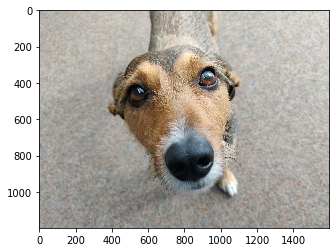

In [5]:
plt.imshow(image)


To ease any further processing of the colorful image of Charlie, a conversion to <i>grayscale</i> is appropriate. Perform the following steps:

- Print the shape of the converted image and describe the parts (<i>hint:</i> look at <code>imread</code> supplied by <i>matplotlib</i>).
- Visualise Charlie in his converted state (<i>hint:</i> look at <code>imshow</code> supplied by <i>matplotlib</i>).

Do you observe any differences with respect to the shape (when comparing the <i>grascale</i> image to the <i>colored</i> one)?

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


In [7]:
gray.shape


(1199, 1600)

The image is 1199 pixels high and 1600 pixels wide. However, there aren't colour channels any longer (marked with the third number "3" in the shape), because the image is gray.

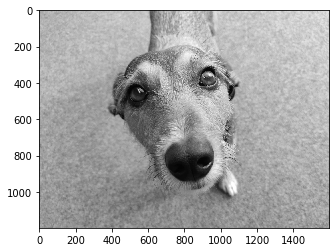

In [8]:
plt.imshow(gray, cmap='gray')


Before digging into <i>convolutional neural networks</i> (or any more sophisticated method), it is always a good idea to get more familiar with the <i>basics</i> first. For this very purpose, and as the <b>second task</b> of this exercise, you have to define the <i>Prewitt operator</i> for the <i>horizontal</i> as well as the <i>vertical</i> approximations of the derivatives of the <i>image intensity function</i> as <i>numpy</i> arrays:

\begin{equation}P_x = \left( 
    \begin{array}{rrr}                                
        1 & 0 & -1 \\
        1 & 0 & -1 \\
        1 & 0 & -1 \\
    \end{array}\right)
\end{equation}

\begin{equation}P_y = \left( 
    \begin{array}{rrr}                                
        1 & 1 & 1 \\
        0 & 0 & 0 \\
        -1 & -1 & -1 \\
    \end{array}\right)
\end{equation}

In [9]:
vertical = np.array([[ 1, 1, 1], 
                   [ 0, 0, 0], 
                   [ -1, -1, -1]])
horizontal = np.array([[ 1, 0, -1], 
                   [ 1, 0, -1], 
                   [ 1, 0, -1]])


After the <i>definition</i> of both variants of the <i>Prewitt</i> operator, apply them to the <i>grayscale</i> version of <i>Charlie</i>. Moreover:

- Plot the result of the <i>horizontal Prewitt</i> operator.
- Plot the result of the <i>vertical Prewitt</i> operator.

Which parts of the image are highlighted? Do you observe any differences?

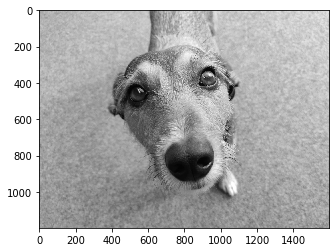

In [11]:
plt.imshow(gray, cmap='gray')


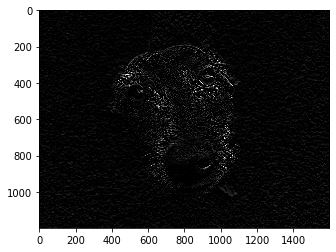

In [12]:
filtered_ch_1 = cv2.filter2D(gray, -1, vertical)
plt.imshow(filtered_ch_1, cmap='gray')


In the vertical version the head of Charlie is highlighted. Especially, you can recognize the eyes and some formative parts of the fur.

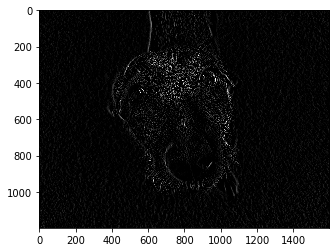

In [13]:
filtered_ch_2 = cv2.filter2D(gray, -1, horizontal)
plt.imshow(filtered_ch_2, cmap='gray')


In the horizontal version the head and body of Charlie are highlighted. The shape of one eye is very prominent. Also the snout is clearly framed. Furthermore, the fur on the forehead is brighter than the most remaining parts of the image. The body is only a little bit highlighted. In conclusion, in the horizontal version is more highlighted than in the vertical version.

To get a better feeling for <i>manually</i> constructed operators, define the <i>Scharr operator</i> for the <i>horizontal</i> as well as the <i>vertical</i> approximations of the derivatives of the <i>image intensity function</i> as <i>numpy</i> arrays:

\begin{equation}S_x = \left( 
    \begin{array}{rrr}                                
        47 & 0 & -47 \\
        162 & 0 & -162 \\
        47 & 0 & -47 \\
    \end{array}\right)
\end{equation}

\begin{equation}S_y = \left( 
    \begin{array}{rrr}                                
        47 & 162 & 47 \\
        0 & 0 & 0 \\
        -47 & -162 & -47 \\
    \end{array}\right)
\end{equation}

In [14]:
sharr_x = np.array([[ 47, 0, -47], 
                   [ 162, 0, -162], 
                   [ 47, 0, -47]])
sharr_y = np.array([[ 47, 162, 47], 
                   [ 0, 0, 0], 
                   [ -47, -162, -47]])


After the <i>definition</i> of both variants of the <i>Scharr</i> operator, apply them to the <i>grayscale</i> version of <i>Charlie</i>. Moreover:

- Plot the result of the <i>horizontal Scharr</i> operator.
- Plot the result of the <i>vertical Scharr</i> operator.

Which parts of the image are highlighted? Do you observe any differences (with respect to <i>each other</i> as well as compared to the <i>Prewitt</i> operator)?

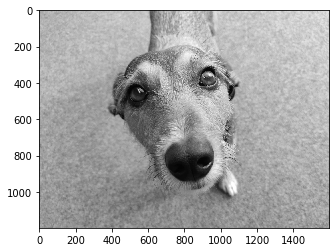

In [15]:
plt.imshow(gray, cmap='gray')


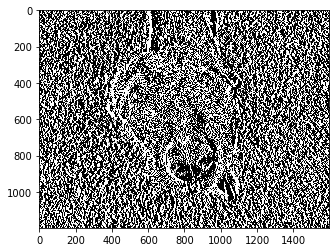

In [16]:
filtered_ch_1b = cv2.filter2D(gray, -1, sharr_x)
plt.imshow(filtered_ch_1b, cmap='gray')


In the horizontal sharr-version it seems that the snout of Charlie is the most highlighted part in the image. Also, Charlie's paw and body are clearly separated from the background. Finally, you can recognize Charlie's head, but it is not that obvious as the mentioned highlights before.

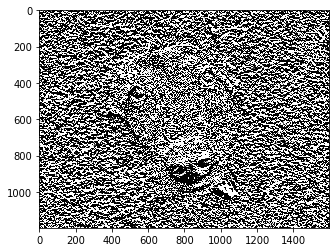

In [17]:
filtered_ch_2b = cv2.filter2D(gray, -1, sharr_y)
plt.imshow(filtered_ch_2b, cmap='gray')


In the vertical scharr-version, it is also the case that Charlie's snout is the most highlighted part of the picture. In contrast to the horizontal version, the body isn't highlighted in the vertical version and the paw is highlighted, but it is difficult to categorise it as a paw. However, in the vertical version you can immediately find out the eyes of Charlie. In the horizontal version, that was possible but more difficult. The horizontal version highlighted Charlie's forms of head, body and nasal bone more the the vertical version.

Comparison of scharr with prewitt: 
In comparison the prewitt-versions Charlie's snout didn't have as much nuances from black to white as in the scharr-versions. In the prewitt-versions the snout was almost black and dark gray. Furthermore, the prewitt-versions highlighted more Charlie's fur at the head. It was more taxing to find out Charlie's form of the head in the scharr-version because it was less focused. Finally, the prewitt-version could transport the gloss in Charlie's eyes fundamentally better than the scharr-version.

# Exercise 2
Up until now, <i>custom filters</i> were defined and applied on images, but as you certainly noticed, <i>no</i> neural network was involed so far. The gist of this exercise is to <i>change</i> that, and get more insight into how <i>convolutional neural networks</i> operate. For this very reason, we are assuming the following <i>filter</i> or <i>kernel</i>:

\begin{equation}F_c = \left( 
    \begin{array}{rrrrr}                                
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1
    \end{array}\right)
\end{equation}


Thus, your <b>first task</b> of this exercise is to perform the following steps:

- Define the custom <i>filter</i> (as depicted above) as a <i>numpy</i> array.
- Create <i>three</i> additional copies of said filter, identical to the transformations as discussed during the lecture.
- Visualize all <i>four</i> filters and try to comment on the respective structures they might detect.

As a <i>hint</i>, your <i>final</i> array of filters should be of the form $\left(F_c, -F_c, F_c^T, -F_c^T\right)$.

In [18]:
custom_filter = np.array([[-1, -0.5, 0, 0.5, 1],
                     [-1, -0.5, 0, 0.5, 1],
                     [-1, -0.5, 0, 0.5, 1],
                     [-1, -0.5, 0, 0.5, 1],
                     [-1, -0.5, 0, 0.5, 1]])


In [19]:
filter_2 = -custom_filter
filter_3 = custom_filter.T
filter_4 = -filter_3
filters = np.array([custom_filter, filter_2, filter_3, filter_4])


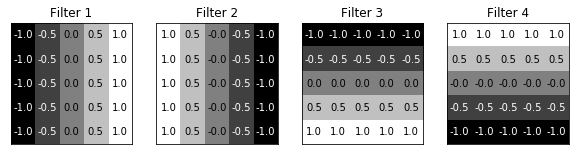

In [20]:
u5.visualize_filters(filters)


They may produce outputs that are smaller than the input.

There is <i>still</i> no neural network involved, but <i>now</i> is the time and place to change that.

- Transform the array of <i>custom</i> filters to a <code>torch.Tensor</code> of appropriate shape.
- Create and initialize a neural network of type <code>InitializedNet</code> using said <i>transformed</i> filters.

What is the <i>shape</i> of our custom filter tensor? Shortly describe the corresponding dimensions.

In [21]:
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)


In [22]:
model = u5.InitializedNet(weight)


In [23]:
print('Custom filter tensor --> shape: ', weight.shape)


Custom filter tensor --> shape:  torch.Size([4, 1, 5, 5])


When you print the "weight" and play with the number in the brackets after "unsqueeze", you can oberserve the following for the shape of the custom filter tensor. The first number "4" refers to "from_numpy(filters)". When you change the amount of filters, also this number will change. Therefore, the first number describes the number of filters. The second number "1" could express that custom filter tensor isn't modified by squeezing this tensor. The third and fourth numbers "5" and "5" point to the fact that every filter array has 5 rows and 5 columns.

After the <i>definition</i> and <i>initialization</i> of the custom <i>model</i>, apply it to the <i>grayscale</i> version of <i>Charlie</i>.

- In contrast to the previous exercise, use <code>get_image_tensor</code> to load Charlie (again, <code>charlie_3.jpg</code>).

Moreover, in order to compare all <i>intermediate</i> steps of the network:

- Plot the result of the <i>convolutional</i> layer.
- Plot the result of the <i>activation</i> layer.
- Plot the result of the <i>pooling</i> layer.

Which parts of the image are highlighted? Do you observe any differences (with respect to <i>each other</i> as well as compared to the <i>other</i> layers)?

In [24]:
tensor_charlie = u5.get_image_tensor('resources/charlie_3.jpg')


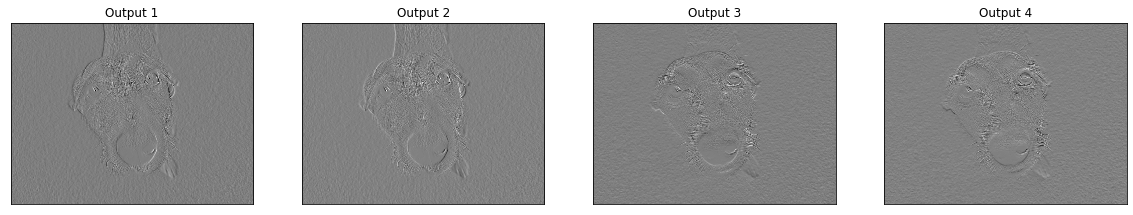

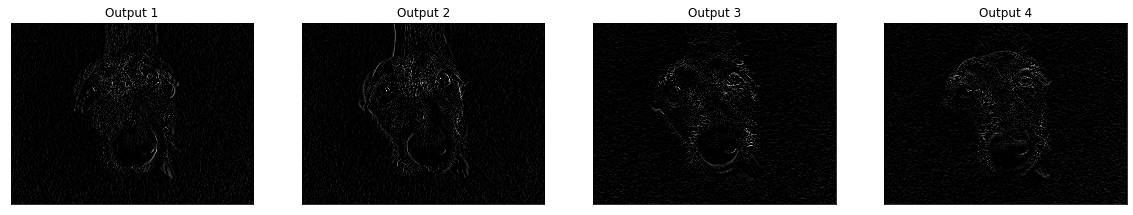

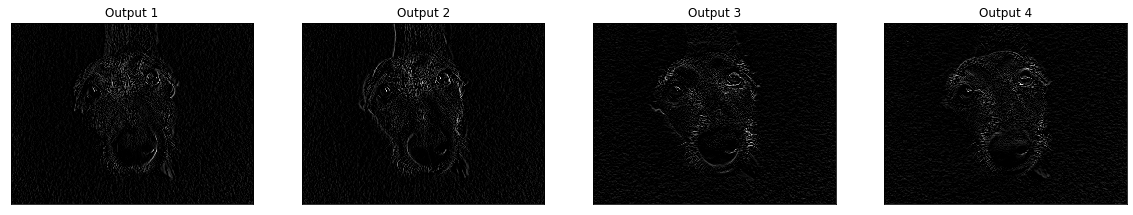

In [25]:
conv_layer , activated_layer , pooling_layer = model(tensor_charlie)
u5.viz_layer(conv_layer)
u5.viz_layer(activated_layer)
u5.viz_layer(pooling_layer)


convolution layer: 
In the first and second output Charlie's body is highlighted (not in the third and fourth outputs). Furthermore you can see the fur on the nasal bone very well. Also, the snout and one eye of Charlie are well visible. In the first free outputs you can see the paw of Charlie. In the first and second output the paw is better recognizable than in the thrid one. Besides that, in the fourth output you can't detect the paw anymore. The first two outputs seem to be more detailed than the last two.


activated layer: Also here you can only recognize Charlie's body in the first two outputs. The first output shows a lot of fur of Charlie. It doesn't show the form of the head very well. The second output present the eyes the most realistic compared to the other outputs. Also, the form of the head is highlighted. The third one highlights the "eyebrows" and fur around the snout the most. The last one sets the focus on the nasal bone of Charlie and one eye. Here, you can recognize Charlie as dog the best in the second output.

pooling layer: As before the body of Charlie is only in the first two outputs visible. The first one highlights the fur of Charlie's head. The sewcond one Charlie's head shape, eyes and fur one the forehead. The third one underlines the fur around the snout, "eyebrows", the fur und the eyes and a bit the eyes. The last one highlights only a part of the fur of Charlie's head, and also the shape of the upper head. In general, it seems that Charlie is well recognizable by using the pooling layer.

Differences between the layers: The convolution layer leads to gray outputs. The others lead to a black background. Moreover the pooling layer highlights detailed parts more concretely than the other layers. 

To get a better feeling for <i>manually</i> defined and <i>fixed</i> filters of <i>convolutional neural networks</i>, a second (slightly different) <i>kernel</i> has to be defined. The following is assumed:

\begin{equation}G_c = \left( 
    \begin{array}{rrrrr}                                
        -1 & -1 & 0.5 & 1 & 1 \\
        -1 & -1 & 0.5 & 1 & 1 \\
        -1 & -1 & 0.5 & 1 & 1 \\
        -1 & -1 & 0.5 & 1 & 1 \\
        -1 & -1 & 0.5 & 1 & 1
    \end{array}\right)
\end{equation}


Your <b>second task</b> of this exercise is to perform the following steps:

- Define the custom <i>filter</i> (as depicted above) as a <i>numpy</i> array.
- Create <i>three</i> additional copies of said filter, identical to the transformations as discussed during the lecture.
- Visualize all <i>four</i> filters and try to comment on the respective structures they might detect.

As a <i>hint</i>, your <i>final</i> array of filters should be of the form $\left(G_c, -G_c, G_c^T, -G_c^T\right)$.

In [26]:
custom_filter_2 = np.array([[-1, -1, 0.5, 1, 1],
                     [-1, -1, 0.5, 1, 1],
                     [-1, -1, 0.5, 1, 1],
                     [-1, -1, 0.5, 1, 1],
                     [-1, -1, 0.5, 1, 1]])


In [27]:
filter_22 = -custom_filter_2
filter_32 = custom_filter_2.T
filter_42 = -custom_filter_2.T
filters2 = np.array([custom_filter_2, filter_22, filter_32, filter_42])


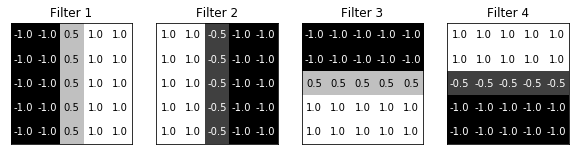

In [28]:
u5.visualize_filters(filters2)


Only half of the input seems to be in the output, when all pixels have the same value that is not 0.

Equivalent to the <i>previous task</i> of this exercise, you are required to:

- Transform the array of <i>custom</i> filters to a <code>torch.Tensor</code> of appropriate shape.
- Create and initialize a neural network of type <code>InitializedNet</code> using said <i>transformed</i> filters.

What is the <i>shape</i> of our custom filter tensor? Shortly describe the corresponding dimensions.

In [29]:
weight2 = torch.from_numpy(filters2).unsqueeze(1).type(torch.FloatTensor)


In [30]:
model2 = u5.InitializedNet(weight2)


In [31]:
print('Second custom filter tensor --> shape: ', weight2.shape)


Second custom filter tensor --> shape:  torch.Size([4, 1, 5, 5])


As above described because it has the same shape:
The first number "4" refers to "from_numpy(filters)". When you change the amount of filters, also this number will change. Therefore, the first number describes the number of filters. The second number "1" could express that custom filter tensor isn't modified by squeezing this tensor. The third and fourth numbers "5" and "5" point to the fact that every filter array has 5 rows and 5 columns.

After the <i>definition</i> and <i>initialization</i> of the second custom <i>model</i>, apply it to the <i>grayscale</i> version of <i>Charlie</i>.

- In contrast to the previous exercise, use <code>get_image_tensor</code> to load Charlie (again, <code>charlie_3.jpg</code>).

Moreover, in order to compare all <i>intermediate</i> steps of the network:

- Plot the result of the <i>convolutional</i> layer.
- Plot the result of the <i>activation</i> layer.
- Plot the result of the <i>pooling</i> layer.

Which parts of the image are highlighted? Do you observe any differences (with respect to <i>each other</i> as well as compared to the <i>other</i> layers)?

In [32]:
tensor_charlie = u5.get_image_tensor('resources/charlie_3.jpg')


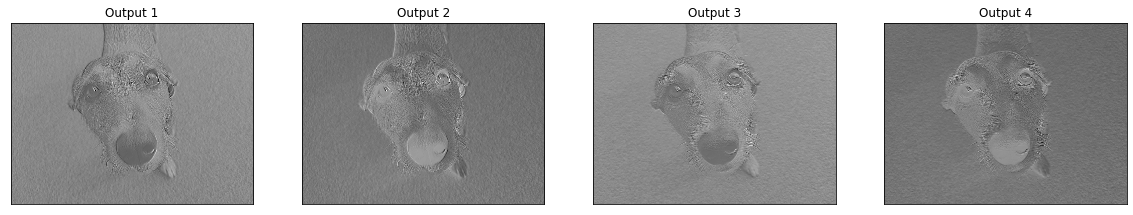

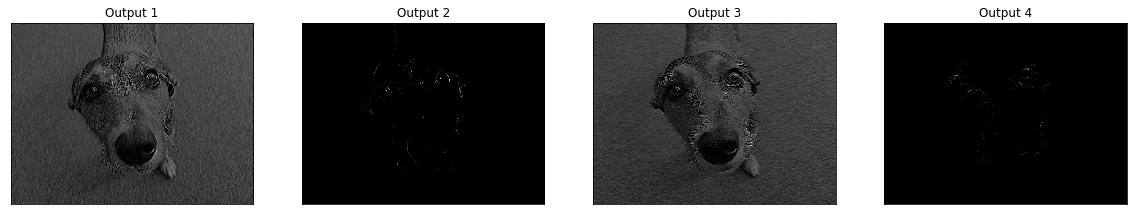

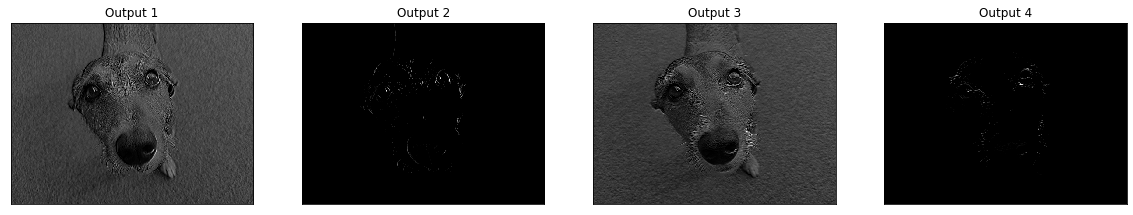

In [33]:
conv_layer2 , activated_layer2 , pooling_layer2 = model2(tensor_charlie)
u5.viz_layer(conv_layer2)
u5.viz_layer(activated_layer2)
u5.viz_layer(pooling_layer2)


Convolutional layer: In the first output the whole Charlie is highlighted. Especially his head. In the second output the snout and eyes of Charlie seem to be the most outlined parts. Futhermore, you can very well distinguish between the left and right part of his face and separate the head from the background. In the third one the snout and eyes are also highlighted as in the outputs before, but now the snout and eyes aren't white like in the second output. They are black. The fourth output highlights similar to the second output but less detailed.

Activation layer: In the second and fourth output you can only detect a few white lines on a black background. You can hardly recognize Charlie as a dog. The first and third output are similar to each other. Here you can recognize Charlie very easily. However, the third one has a bit more white pixels in it than the first one.

Pooling layer: It is very similar in its outputs to the activation layer. You can use the same distincitions and descriptions. 

All three layers compared: The activation and pooling layer are similar but slightly different. For example, the lines of the second and fourth outputs are more outlined in the case of the pooling layer. The shadows and dark fur seem to be a little bit darker in the activation layer. The convolutional layer generates paler and brighter outputs than the other layers.

# Exercise 3

As you are now an expert in defining and applying <i>custom kernels</i>, we will now move on to <i>automatically</i> learn <i>kernels</i> to create more expressive <i>systems</i>. For the <b>first task</b> of this exercise, define an <i>instance</i> of the type <code>SimpleNamespace</code>, and set the hyperparameters accordingly:

- <code>batch_size = 64</code>
- <code>test_batch_size = 1000</code>
- <code>epochs = 5</code>
- <code>lr = 0.001</code>
- <code>momentum = 0.9</code>

The field <code>log_interval</code> can be chosen freely as well as the <i>device</i> on which to compute.

In [34]:
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5,
                       lr=0.001, momentum=0.9, log_interval=100)


In this exercise you will be working with a data set composed of various <i>images</i> of fashion items. For curious minds, more information regarding this data set can be found at (maybe it looks already familiar to you):

<cite>Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747</cite>

Moreover, perform the following steps in order to get started <i>filtering</i> image data using <i>convolutional</i> neural networks:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>Fashion-MNIST</i> data set (returns the <i>training</i> as well as the <i>test</i> set data loader).
- Display the first <i>four</i> images of the <i>Fashion-MNIST</i> data set.

Can you identify possible <i>labels</i> of the four images?

In [35]:
X = torch.rand(42) 


In [43]:
use_cuda = torch.cuda.is_available()
train_loader, test_loader = u5.get_FashionMNIST_data(args, use_cuda)


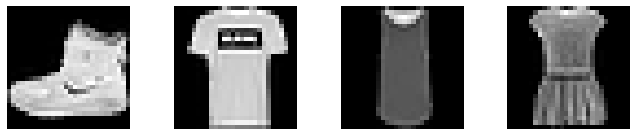

In [37]:
u5.display_FashionMNIST(train_loader, 4)


1. picture: shoe
2. picture: t-shirt
3. picture: maybe a dress
4. picture: dress

In order to define a model based on <i>convolutional</i> as well as a <i>dense feedforward layers</i> for identifying images as visualized above, some minimal knowledge about the <i>structure</i> of the images is required:

- Find out the amount of <i>input channels</i> of the data set.
- Set the output dimensionality to be $d_{out} = 10$.

In [38]:
image_shape = train_loader.dataset[0][0].shape
print(r'Shape of an image: {}'.format(tuple(image_shape)))


Shape of an image: (1, 28, 28)


The shape describes the width, height and the amount of channels. In that case, the picture is 28 pixels high and 28 pixels wide. It follows that the number of input channels is 1.

In [83]:
output_dim = 10


On the basis of the <i>neural network</i> implementation of the lecture, construct a <i>convolutional neural network</i> with the following attributes (to get you started, later on you will modify these settings in order to get a better performance on the corresponding test set):

- One <i>convolutional</i> input layer, accepting images of the <i>Fashion-MNIST</i> data set.
- Two <i>dense</i> hidden layers with an input as well as output dimensionality of $128$ each.
- One <i>dense</i> output layer, with an output dimensionality as defined previously.
- As the nonlinearity, <i>rectified linear units</i> should be applied.

To summarize your <b>second task</b> of this exercise:

- Implement a <i>Python class</i> <code>ConvolutionalNeuralNet</code> as discussed during the lecture.
- Keep in mind, which <i>activation</i> function a <i>multi-class</i> setting requires.
- Optionally, <i>initialize</i> the parameters of the model in a different way.

In [46]:
from u5_utils import *


In [47]:
class ConvolutionalNeuralNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNeuralNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 2, 5) 
        
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 128)
        
        self.fc3 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 3, 3) 
        x = x.view(-1, 2*8*8) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
    

Train the previously defined <i>convolutional neural network</i> model by applying the corresponding <i>data loader</i> (keep in mind for which set we want the model to be <i>trained</i>) as well as the <i>optimizer</i>. Report the performance on the <i>test set</i> afterwards. Experiment with different hyperparameter settings, for instance set different values for $\ldots$

- $\ldots$ the learning rate <code>lr</code>.
- $\ldots$ the momentum term <code>momentum</code>.
- $\ldots$ the amount of epochs <code>epochs</code>.

Do you notice any serious differences? If yes, which <i>settings</i> lead to them? If not, try to argue about a <i>possible</i> reason.

In [48]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

model_neu = ConvolutionalNeuralNet().to(device)
optimizer = optim.SGD(model_neu.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args.epochs + 1):
    u5.train(args, model_neu, device, train_loader, optimizer, epoch)
    u5.test(args, model_neu, device, test_loader)
    

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.286613
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.261215
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.229881
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.155334
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.924237
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.372986
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.041517
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.880883
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.853568
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.660417

Test set: Average loss: 0.0009, Accuracy: 6754/10000 (67.54%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.825079
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.718039
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.747285
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.868260
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.764231
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.726079
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.662698
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.488492
Train Epoch: 2 [57600/60000 (96%)]	Lo

In [49]:
args2 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5,
                       lr=0.1, momentum=0.9, log_interval=100)

model_neu2 = ConvolutionalNeuralNet().to(device)
optimizer2 = optim.SGD(model_neu2.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args2.epochs + 1):
    u5.train(args2, model_neu2, device, train_loader, optimizer2, epoch)
    u5.test(args2, model_neu2, device, test_loader)
    

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.279501
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.208676
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.989694
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.313914
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.067656
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.856586
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.846737
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.785364
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.802164
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.674659

Test set: Average loss: 0.0008, Accuracy: 6954/10000 (69.54%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.031076
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.651794
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.785677
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.830021
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.654720
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.546355
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.515061
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.472611
Train Epoch: 2 [57600/60000 (96%)]	Lo

In [51]:
args3 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5,
                       lr=0.001, momentum=0.2, log_interval=100)

model_neu3 = ConvolutionalNeuralNet().to(device)
optimizer3 = optim.SGD(model_neu3.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args3.epochs + 1):
    u5.train(args3, model_neu3, device, train_loader, optimizer3, epoch)
    u5.test(args3, model_neu3, device, test_loader)
    

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.308888
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.288943
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.304810
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.300465
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.293070
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.283375
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.283262
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.266501
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.245463
Train Epoch: 1 [60000/60000 (100%)]	Loss: 2.217681

Test set: Average loss: 0.0022, Accuracy: 2853/10000 (28.53%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.199195
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.144599
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.840803
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.630006
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.482599
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.462348
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1.152849
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.028270
Train Epoch: 2 [57600/60000 (96%)]	Lo

In [56]:
args4 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1,
                       lr=0.001, momentum=0.9, log_interval=100)

model_neu4 = ConvolutionalNeuralNet().to(device)
optimizer4 = optim.SGD(model_neu4.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args4.epochs + 1):
    u5.train(args4, model_neu4, device, train_loader, optimizer4, epoch)
    u5.test(args4, model_neu4, device, test_loader)
    

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.290753
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.288359
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.286114
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.278383
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.274641
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.260587
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.228031
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.191168
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.101693
Train Epoch: 1 [60000/60000 (100%)]	Loss: 2.077469

Test set: Average loss: 0.0021, Accuracy: 3773/10000 (37.73%)



In [57]:
args5 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5,
                       lr=0.1, momentum=0.2, log_interval=100)

model_neu5 = ConvolutionalNeuralNet().to(device)
optimizer5 = optim.SGD(model_neu5.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args5.epochs + 1):
    u5.train(args5, model_neu5, device, train_loader, optimizer5, epoch)
    u5.test(args5, model_neu5, device, test_loader)
    

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.289555
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.252884
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.104565
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.697716
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.083468
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.238153
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.838611
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.949114
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.735317
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.623542

Test set: Average loss: 0.0008, Accuracy: 7071/10000 (70.71%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.818209
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.693931
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.815608
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.686611
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.697750
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.694598
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.654093
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.701237
Train Epoch: 2 [57600/60000 (96%)]	Lo

In [58]:
args6 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1,
                       lr=0.1, momentum=0.2, log_interval=100)

model_neu6 = ConvolutionalNeuralNet().to(device)
optimizer6 = optim.SGD(model_neu6.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args6.epochs + 1):
    u5.train(args6, model_neu6, device, train_loader, optimizer6, epoch)
    u5.test(args6, model_neu6, device, test_loader)
    

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.301272
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.281350
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.280367
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.286931
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.279997
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.241420
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.221294
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.172245
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.037035
Train Epoch: 1 [60000/60000 (100%)]	Loss: 1.971908

Test set: Average loss: 0.0020, Accuracy: 4694/10000 (46.94%)



In [60]:
args7 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1,
                       lr=0.1, momentum=0.9, log_interval=100)

model_neu7 = ConvolutionalNeuralNet().to(device)
optimizer7 = optim.SGD(model_neu7.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args7.epochs + 1):
    u5.train(args7, model_neu7, device, train_loader, optimizer7, epoch)
    u5.test(args7, model_neu7, device, test_loader)
    

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.315792
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.305702
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.302221
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.299869
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.307742
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.296518
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.286145
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.267267
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.196995
Train Epoch: 1 [60000/60000 (100%)]	Loss: 2.174307

Test set: Average loss: 0.0021, Accuracy: 2832/10000 (28.32%)



In [61]:
args8 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1,
                       lr=0.1, momentum=0.9, log_interval=100)

model_neu8 = ConvolutionalNeuralNet().to(device)
optimizer8 = optim.SGD(model_neu8.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args8.epochs + 1):
    u5.train(args8, model_neu8, device, train_loader, optimizer8, epoch)
    u5.test(args8, model_neu8, device, test_loader)
    

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.305953
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.300084
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.288886
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.290109
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.262840
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.198360
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.824593
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.213633
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.134315
Train Epoch: 1 [60000/60000 (100%)]	Loss: 1.131147

Test set: Average loss: 0.0010, Accuracy: 6207/10000 (62.07%)



learing rate | momentum | epochs | accuracy in %
1. 0.001 | 0.9 | 5 | 81.60

2. 0.1 | 0.9 | 5 | 79.40
3. 0.001 | 0.2 | 5 | 77.33
4. 0.001 | 0.9 | 1 | 37.73

5. 0.1 | 0.2 | 5 | 80.42
6. 0.1 | 0.2 | 1 | 46.94
7. 0.1 | 0.9 | 1 | 28.32
8. 0.001 | 0.2 | 1 | 62.07

The result of the 1. version is with 81.60 % accuracy good. However, we used a neuronal network. Therefore, there could be a better result. If you change only one parameter lr or mom, you won't discover huge differences in the accuracy of the outcome. The amount of epochs seems to have the strongest impact on the accuracy. When you only decrease the number of epochs from 5 to 1, the accuracy only adds up to 37.73 % (4. version). When you modify the lr and mom there is only a very small impact (5. version). However, there are big changes when you modify the mom and epochs number (1) (62.07 % | 8. version), the lr and epochs number (1) (28.32 % | 7. version) and the lr, momentum and epochs number (1) (46.94 % | 6. version). It follows from this, that it is very important to train our model several times.

As already discussing during the lecture and experimented with during the <i>last</i> assignments, simply <i>inverting</i> the original images on which the model is trained, may already be enough to break it. This time, to spice things a little bit up, we do not <i>flip</i> the images, but <i>rotate</i> them by a specified <i>degree</i>. To show this behavior, perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>Fashion-MNIST</i> data set with <code>degrees</code> set to $d = 42$.
- Display the first <i>four</i> images of the <i>Fashion-MNIST</i> data set.

Can you identify possible <i>labels</i> of the four images? How do they differ from the previous visualization?

- Evaluate the previously trained <i>convolutional neural network</i> on the flipped data set.

If you experiment with different <i>hyperparameter settings</i> with respect to the original data set, do the performances differ when tested on the <i>flipped</i> data set?

In [62]:
X = torch.rand(42) 


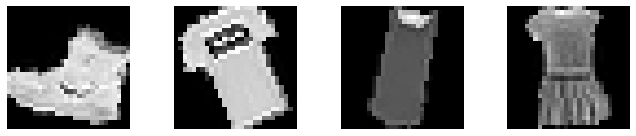

In [64]:
train_loader_rot, test_loader_rot = u5.get_FashionMNIST_data(args, use_cuda, 42)
u5.display_FashionMNIST(train_loader_rot, 4)


Labels: 
1. shoe
2. t-shirt
3. maybe dress
4. dress



The objects in the images are more or less rotated by maximal 42 degrees in different directions.

In [67]:
u5.test(args, model_neu, device, test_loader_rot)


Test set: Average loss: 0.0018, Accuracy: 4942/10000 (49.42%)



In [82]:
u5.test(args2, model_neu2, device, test_loader_rot)


Test set: Average loss: 0.0020, Accuracy: 4909/10000 (49.09%)



In [81]:
u5.test(args3, model_neu3, device, test_loader_rot)


Test set: Average loss: 0.0015, Accuracy: 5184/10000 (51.84%)



In [80]:
u5.test(args4, model_neu4, device, test_loader_rot)


Test set: Average loss: 0.0021, Accuracy: 2896/10000 (28.96%)



In [79]:
u5.test(args5, model_neu5, device, test_loader_rot)


Test set: Average loss: 0.0020, Accuracy: 4804/10000 (48.04%)



In [78]:
u5.test(args6, model_neu6, device, test_loader_rot)


Test set: Average loss: 0.0021, Accuracy: 3336/10000 (33.36%)



In [77]:
u5.test(args7, model_neu7, device, test_loader_rot)


Test set: Average loss: 0.0022, Accuracy: 2241/10000 (22.41%)



In [76]:
u5.test(args8, model_neu8, device, test_loader_rot)


Test set: Average loss: 0.0014, Accuracy: 4665/10000 (46.65%)



Yes, all hyperparametersettings on the rotated dataset have worse outcomes than on the normal dataset. The best accuracy amounts to circa 52 %. Previously, the best accuracy was circa 82 % on the non-rotated dataset.